In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/sales.csv", parse_dates=["order_date"])
df.head()

,order_id,order_date,customer_id,product_id,category,quantity,unit_price,discount,city
0,1,2024-01-05,101,2001,Electronics,1,500,0.10,Paris
1,2,2024-01-10,102,2003,Clothing,3,40,0.00,Lyon
2,3,2024-02-02,101,2002,Electronics,1,300,0.05,Paris
3,4,2024-02-15,103,2004,Home,2,120,0.20,Marseille
4,5,2024-03-01,104,2005,Clothing,1,60,0.00,Lille


## Objectif
Segmenter les clients à l’aide de la méthode RFM afin d’identifier :
- les clients fidèles
- les clients à risque
- les clients occasionnels

#### RFM = Recency-Frequency-Monetaire

In [4]:
#features business
df['revenue'] = df['quantity'] * df['unit_price']
df['revenue_after_discount'] = df['revenue'] * (1 - df['discount'])

In [5]:
#Creation du tableau RFM
rfm = (df.groupby("customer_id")
       .agg(
           recency=("order_date", lambda x: (df["order_date"].max() - x.max()).days),
           frequency=("order_id", "nunique"),
           monetary=("revenue", "sum")
       ))
rfm.head()

,recency,frequency,monetary
customer_id,,,
101,28,2,800
102,51,1,120
103,15,1,240
104,0,1,60


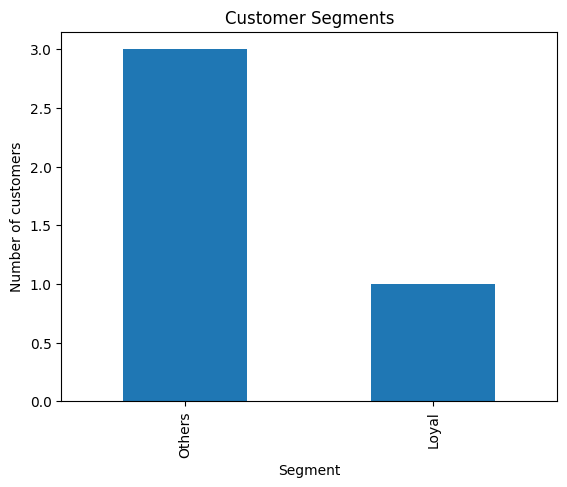

In [6]:
#Segments simples (lisibles)
rfm["segment"] = "Others"
rfm.loc[(rfm["recency"] <= 30) & (rfm["frequency"] >= 2), "segment"] = "Loyal"
rfm.loc[(rfm["recency"] > 90), "segment"] = "At risk"

#graph
rfm["segment"].value_counts().plot(kind="bar", title="Customer segments")
plt.title("Customer Segments")
plt.xlabel("Segment")
plt.ylabel("Number of customers")

#sauvegarde 
plt.savefig("../reports/Customer_Segments.png", bbox_inches="tight")
plt.show()

## Conclusions – Segmentation clients

- Une partie significative des clients appartient au segment "Loyal", indiquant une bonne fidélité.
- Le segment "At risk" représente une opportunité de relance via des campagnes marketing ciblées.
- Les clients "Others" constituent un potentiel de conversion vers des clients fidèles.